# **Property Click Prediction on NoBroker**

This code snippet sets up the environment for data analysis and modeling by importing necessary libraries for data manipulation, visualization, preprocessing, model building, and evaluation. It also configures pandas to control the display of DataFrame outputs, making it easier to handle large datasets.


In [ ]:
#Importing libraries that are required for the prediction model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

# View available options for pandas
print(pd.describe_option('max_*'))

# View options for pandas, use 'display.' prefix for clarity
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

display.max_categories : int
    This sets the maximum number of categories pandas should output when
    printing out a `Categorical` or a Series of dtype "category".
    [default: 8] [currently: 8]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 or None and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection and defaults to 20.
    [default: 20] [currently: 50]
display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflow

In [ ]:
pip install xgboost

**Loading and Parsing Property Data for Analysis**

This code snippet efficiently loads three datasets required for analyzing property interactions and photo counts, ensuring date columns are properly parsed as datetime objects for accurate time-based analysis.

In [ ]:
data = pd.read_csv("property_data_set.csv", parse_dates = ['activation_date'],
                   infer_datetime_format = True, dayfirst=True)

# Data containing the timestamps of interaction on the properties
interaction = pd.read_csv("property_interactions.csv",
                          parse_dates = ['request_date'] , infer_datetime_format = True, dayfirst=True)

# Data containing photo counts of properties
pics = pd.read_table("property_photos.tsv")

<ipython-input-6-d40cb273ea21>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv("property_data_set.csv", parse_dates = ['activation_date'],
<ipython-input-6-d40cb273ea21>:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  interaction = pd.read_csv("property_interactions.csv",


**Displaying the Shape of Property, Photos, and Interactions Data**

This code snippet is used to verify that the datasets have been loaded correctly by printing the number of rows and columns in each dataset. It provides a quick overview of the size of each dataset, which is essential for further data analysis and processing

In [ ]:
print('Property data Shape', data.shape)
print('Pics data Shape',pics.shape)
print('Interaction data Shape',interaction.shape)

Property data Shape (28888, 21)
Pics data Shape (28888, 2)
Interaction data Shape (170611, 2)


In [ ]:
#Sample of 2 records from the property_dataset
data.sample(2)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
12774,ff8081815a2848ed015a2b2a407e1afe,BHK2,2017-02-11 15:12:00,2,3,3.0,SEMI_FURNISHED,0,12.912293,77.652416,FAMILY,0,HSR Layout,TWO_WHEELER,2,800,0,560102.0,19000,100000,IF
27833,ff8081815b0aa050015b0eb677b94f51,RK1,2017-03-27 16:49:00,1,1,4.0,NOT_FURNISHED,0,12.916504,77.637967,ANYONE,0,Koramangala,TWO_WHEELER,0,250,0,560034.0,7500,50000,IF


In [ ]:
#Sample of 2 records from the pics dataset
pics.sample(2)

,property_id,photo_count
3494,ff808181538513c5015389ac06883659,3
7605,ff808181590163a301590177c2d303a9,9


In [ ]:
#Sample of 2 records from the property_interactions dataset
interaction.sample(2)

,property_id,request_date
25774,ff808181539ee4de0153a2d91bd823cb,2017-03-13 20:47:53
84743,ff8081815a30d446015a362291a3270a,2017-03-11 12:14:44


In [ ]:
# Types of columns in pics dataframe
pics.dtypes

property_id    object
photo_urls     object
dtype: object

In [ ]:
# Number of nan values in respective columns of the pics dataframe
pics.isna().sum()

property_id        0
photo_urls     11022
dtype: int64

In [ ]:
# Try to correct the first Json
text_before = pics['photo_urls'][0]
print('Before Correction: \n\n', text_before)
# Try to replace corrupted values then convert to json
text_after = text_before.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","')
print("\n\nAfter correction and converted to json: \n\n", json.loads(text_after))

Before Correction: 

 [{\title\":\"Balcony\",\"name\":\"IMG_20131006_120837.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_65149_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_65149_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_65149_large.jpg\"},\"displayPic\":false},{\"title\":\"Bathroom\",\"name\":\"IMG_20131006_120734.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_63511_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_63511_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_63511_large.jpg\"},\"displayPic\":false},{\"title\":\"Bedroom\",\"name\":\"IMG_20131006_120643.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_16708_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20

The error mentionned in the assignment pertaining to the URL issue in the property_photos.tsv file is solved with the below code and thus the corrected dataframe will be used to get the number of photos uploaded for the respective property.

**Correcting Corrupted JSON and Counting Photos**

In [ ]:
# Function to correct corrupted json and get count of photos
def correction (x):
    # if value is null put count with 0 photos
    if x is np.nan or x == 'NaN':
        return 0
    else :
        # Replace corrupted values then convert to json and get count of photos
        return len(json.loads( x.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","') ))

# Apply Correction Function
pics['photo_count'] = pics['photo_urls'].apply(correction)

**Removing the photo_urls Column and Sampling the Data**

This code snippet deletes the now unnecessary photo_urls column from the pics DataFrame and then displays a random sample of the remaining data. This helps in verifying that the photo_count column has been correctly created and the DataFrame is clean and ready for further analysis.

In [ ]:
# Delete photo_urls column
del pics['photo_urls']
# Sample of Pics data
pics.sample(5)

,property_id,photo_count
17458,ff8081815a701e88015a7e456fa1240d,0
15884,ff8081815a5f1287015a5f8b62b41c89,0
2655,ff80818152588847015258beacad0496,1
11450,ff8081815a1817c2015a189f57f23347,7
2032,ff8081815148d8e301514901153a01f9,5


Number of Interactions within 3 days

In [ ]:
# Merge data with interactions data on property_id
num_req = pd.merge(data, interaction, on ='property_id')[['property_id', 'request_date', 'activation_date']]
num_req.head(5)

,property_id,request_date,activation_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00


In [ ]:
## Number of Requests (num_req)
# # The variable num_req represents the count or quantity of requests made
# within a specified context or system. It is used to track the frequency or
# volume of requests processed, often in the context of computing, network
# traffic, or service utilization metrics.
print(num_req.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170611 entries, 0 to 170610
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   property_id      170611 non-null  object        
 1   request_date     170611 non-null  object        
 2   activation_date  170611 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 3.9+ MB
None


**Conversion of request_date Column to Datetime Format**

The code snippet converts the request_date column within the pandas DataFrame num_req into datetime format using pd.to_datetime()

In [ ]:
num_req['request_date'] = pd.to_datetime(num_req['request_date'])

**Calculation of Days Between Request and Activation Dates**

The operation computes the number of days between the request_date and activation_date columns in the DataFrame num_req, storing the result in a new column request_day. This calculation enables the selection and analysis of requests based on the time elapsed between their submission and activation, facilitating temporal querying and insights into the request lifecycle.

In [ ]:
# Get a Time between Request and Activation Date to be able to select request within the number of days
num_req['request_day'] = (num_req['request_date'] - num_req['activation_date']).dt.days

In [ ]:
# Show the first row of data
num_req.head(10)

,property_id,request_date,activation_date,request_day
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00,1
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00,0
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00,1
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00,2
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00,23
5,ff8080814702d3d10147068359d200cd,2017-03-13 00:18:47,2017-03-07 12:02:00,5
6,ff8080814702d3d10147068359d200cd,2017-03-18 22:54:01,2017-03-07 12:02:00,11
7,ff8080814702d3d10147068359d200cd,2017-03-14 19:04:26,2017-03-07 12:02:00,7
8,ff8080814702d3d10147068359d200cd,2017-03-18 13:38:11,2017-03-07 12:02:00,11
9,ff8080814702d3d10147068359d200cd,2017-03-28 09:57:10,2017-03-07 12:02:00,20


**Count of Requests within First 3 Days by Property ID**

The code snippet calculates the number of requests made within the first 3 days after activation for each property_id in the num_req DataFrame. It creates a new DataFrame num_req_within_3d that aggregates and counts these requests, displaying the results alongside each property_id.

In [ ]:
# Get a count of requests in the first 3 days
num_req_within_3d = num_req[num_req['request_day'] < 3].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 3 days
num_req_within_3d = num_req_within_3d.rename({'request_day':'request_day_within_3d'},axis=1)
# Dataset with the number of requests within 3 days
num_req_within_3d

,property_id,request_day_within_3d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,3
2,ff808081470c645401470fb03f5800a6,15
3,ff808081470c6454014715eaa5960281,5
4,ff808081474aa867014771a0298f0aa6,25
...,...,...
13205,ff8081815b1fdda8015b1fdf585c004b,2
13206,ff8081815b1fdda8015b1fe675ae0146,5
13207,ff8081815b1fdda8015b1ffee8a305d2,2
13208,ff8081815b200540015b20158b0103c9,2


**Distribution of Number of Requests within First 3 Days**

The code snippet calculates the frequency distribution of the number of requests within the first 3 days (request_day_within_3d) across different property_ids in the num_req_within_3d DataFrame. It displays the top 10 most common counts of requests within this period, providing an overview of the typical early engagement levels for properties shortly after activation. This analysis helps identify common patterns or outliers in initial request behaviors.

In [ ]:
num_req_within_3d['request_day_within_3d'].value_counts()[:10]

request_day_within_3d
1     5940
2     2741
3     1579
4      887
5      583
6      373
7      246
8      186
9      148
11     105
Name: count, dtype: int64

In [ ]:
## Categorization Function Based on Value Ranges of Request Day within 3 days
def divide(x):
    if x in [1,2]:
        return 'cat_1_to_2'
    elif x in [3,4,5]:
        return 'cat_3_to_5'
    else:
        return 'cat_above_5'

In [ ]:
## Categorization of Requests within First 3 Days
num_req_within_3d['categories_3day'] = num_req_within_3d['request_day_within_3d'].apply(divide)
num_req_within_3d.head(3)

,property_id,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,3,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,15,cat_above_5


In [ ]:
## Distribution of Request Categories within First 3 Days
num_req_within_3d['categories_3day'].value_counts()

categories_3day
cat_1_to_2     8681
cat_3_to_5     3049
cat_above_5    1480
Name: count, dtype: int64

**Number of interactions within 7 days**

**Count of Requests within First 7 Days by Property ID**
The code calculates how many requests were made within the first 7 days after each property in the `num_req` DataFrame was activated. It then creates a new DataFrame `num_req_within_7d` that summarizes and counts these requests for each property, showing the counts alongside their respective property IDs. This analysis offers insights into early request behavior following property activation, providing a broader view of demand and engagement patterns beyond the initial 3-day period.

In [ ]:
# Get a count of requests in the first 7 days
num_req_within_7d = num_req[num_req['request_day'] < 7].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 7 days
num_req_within_7d = num_req_within_7d.rename({'request_day':'request_day_within_7d'},axis=1)
# Dataset with the number of requests within 7 days
num_req_within_7d

,property_id,request_day_within_7d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,5
2,ff808081470c645401470fb03f5800a6,22
3,ff808081470c6454014715eaa5960281,7
4,ff808081474aa867014771a0298f0aa6,52
...,...,...
17381,ff8081815b1fdda8015b1fe675ae0146,8
17382,ff8081815b1fdda8015b1ffee8a305d2,3
17383,ff8081815b1fdda8015b2000369205fd,2
17384,ff8081815b200540015b20158b0103c9,2


In [ ]:
## Distribution of Number of Requests within First 7 Days
num_req_within_7d['request_day_within_7d'].value_counts()[:10]

request_day_within_7d
1     5856
2     3381
3     2118
4     1421
5     1047
6      735
7      597
8      373
9      323
10     240
Name: count, dtype: int64

In [ ]:
## Categorization of Requests within First 7 Days
num_req_within_7d['categories_7day'] = num_req_within_7d['request_day_within_7d'].apply(divide)
num_req_within_7d

,property_id,request_day_within_7d,categories_7day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5


In [ ]:
## Distribution of Request Categories within First 7 Days
num_req_within_7d['categories_7day'].value_counts()

categories_7day
cat_1_to_2     9237
cat_3_to_5     4586
cat_above_5    3563
Name: count, dtype: int64

**Merging and Labeling Request Data**

The code snippet merges the num_req_within_7d and num_req_within_3d DataFrames based on the property_id column, using a left join (how='left'). This merge combines the counts of requests made within the first 7 days (request_day_within_7d) and within the first 3 days (request_day_within_3d) for each property. The resulting DataFrame label_data contains these merged columns, allowing for further analysis or labeling of properties based on their early request patterns.

In [ ]:
label_data = pd.merge(num_req_within_7d, num_req_within_3d, on ='property_id' , how='left')
# label_data['request_day_within_3d'] = label_data['request_day_within_3d'].fillna(0)
label_data.head(3)

,property_id,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5,15.0,cat_above_5


In [ ]:
label_data.isna().sum()

property_id                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
dtype: int64

In [ ]:
data_with_pics = pd.merge(data, pics, on ='property_id', how = 'left')
data_with_pics.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12


In [ ]:
dataset = pd.merge(data_with_pics, label_data, on ='property_id')
dataset.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5


In [ ]:
dataset.isna().sum()

property_id                 0
type                        0
activation_date             0
bathroom                    0
floor                       0
                         ... 
photo_count                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
Length: 26, dtype: int64

In [ ]:
dataset['locality'].value_counts()

locality
Whitefield               517
JP Nagar                 415
Marathahalli             414
HSR Layout               380
Electronic City          341
                        ... 
Kereguddadahalli           1
Benson town                1
Block 1st Koramangala      1
Maruthi seva Nagar         1
Kammanahalli,Banswadi      1
Name: count, Length: 1714, dtype: int64

In [ ]:
# Dropped those columns that won't have an effect on the number of requests
dataset = dataset.drop(['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality'  ] , axis=1)

In [ ]:
# info about all columns
print('Column : Num. of null values')
print(dict(dataset.isna().sum()))
print('\n\n')
print('Column : data type')
print(dict(dataset.dtypes))

Column : Num. of null values
{'type': 0, 'bathroom': 0, 'floor': 0, 'total_floor': 23, 'furnishing': 0, 'gym': 0, 'lease_type': 0, 'lift': 0, 'parking': 0, 'property_age': 0, 'property_size': 0, 'swimming_pool': 0, 'rent': 0, 'deposit': 0, 'building_type': 38, 'photo_count': 0, 'request_day_within_7d': 0, 'categories_7day': 0, 'request_day_within_3d': 4176, 'categories_3day': 4176}



Column : data type
{'type': dtype('O'), 'bathroom': dtype('int64'), 'floor': dtype('int64'), 'total_floor': dtype('float64'), 'furnishing': dtype('O'), 'gym': dtype('int64'), 'lease_type': dtype('O'), 'lift': dtype('int64'), 'parking': dtype('O'), 'property_age': dtype('int64'), 'property_size': dtype('int64'), 'swimming_pool': dtype('int64'), 'rent': dtype('int64'), 'deposit': dtype('int64'), 'building_type': dtype('O'), 'photo_count': dtype('int64'), 'request_day_within_7d': dtype('int64'), 'categories_7day': dtype('O'), 'request_day_within_3d': dtype('float64'), 'categories_3day': dtype('O')}


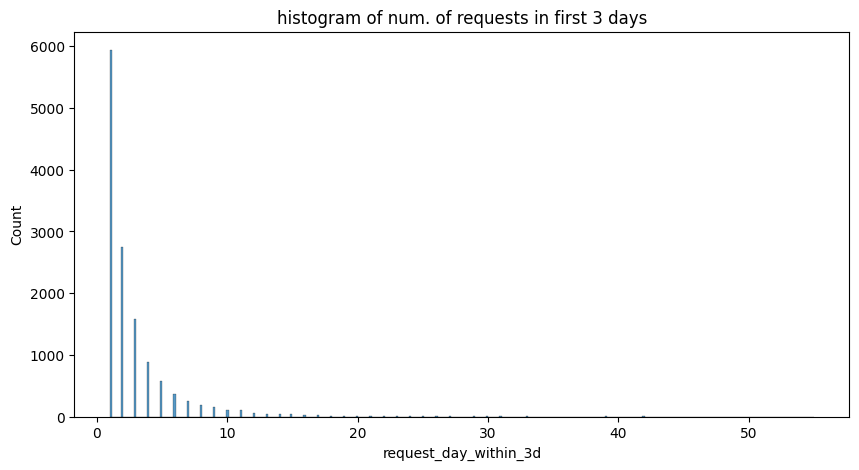

In [ ]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

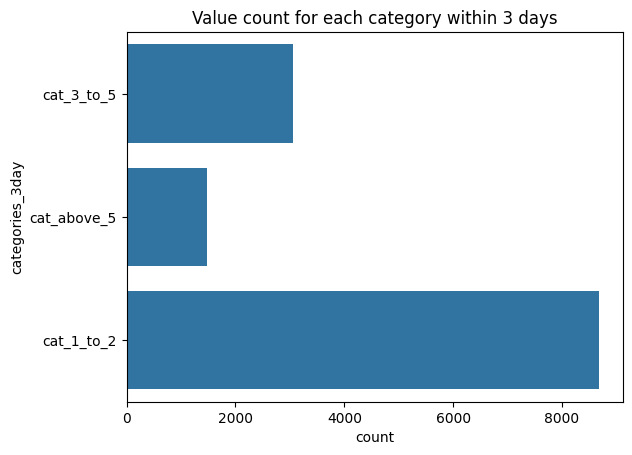

In [ ]:
sns.countplot(y=dataset.categories_3day)
plt.title('Value count for each category within 3 days')
plt.show()

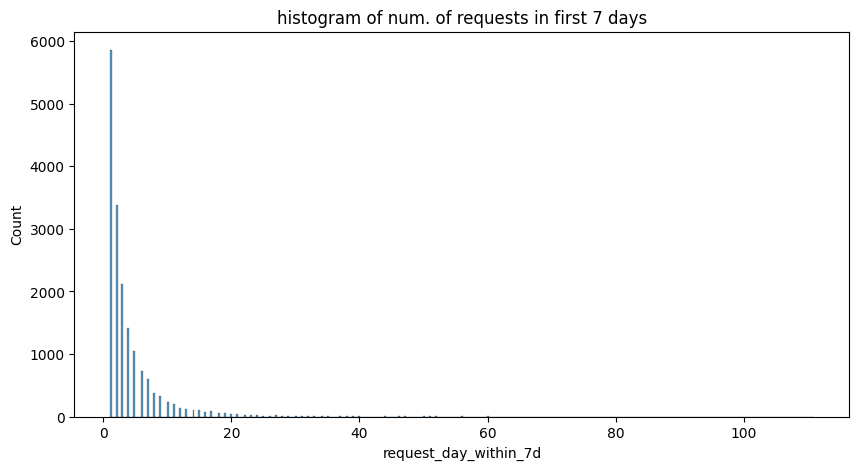

In [ ]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

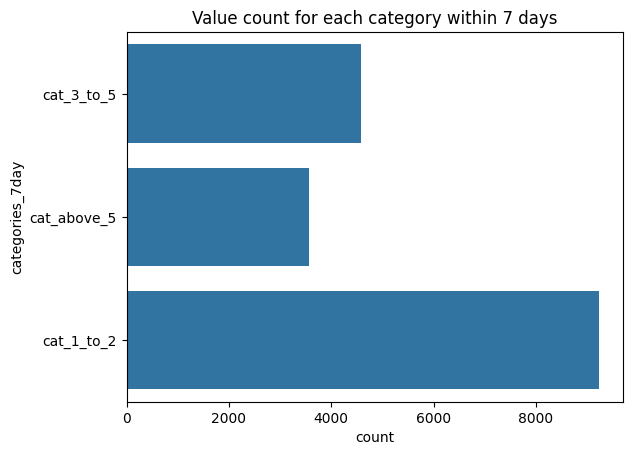

In [ ]:
sns.countplot(y=dataset.categories_7day)
plt.title('Value count for each category within 7 days')
plt.show()

In [ ]:
# Get categorical columns
df_cat = dataset.select_dtypes(include=['object'])
# Get numeric columns
df_num = dataset.select_dtypes(exclude=['object'])

In [ ]:
print("Categorical Columns : \n",list(df_cat.columns) )
print("Numeric Columns : \n",list(df_num.columns) )

Categorical Columns : 
 ['type', 'furnishing', 'lease_type', 'parking', 'building_type', 'categories_7day', 'categories_3day']
Numeric Columns : 
 ['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count', 'request_day_within_7d', 'request_day_within_3d']


In [ ]:
df_cat.sample(2)

,type,furnishing,lease_type,parking,building_type,categories_7day,categories_3day
12963,BHK1,SEMI_FURNISHED,FAMILY,TWO_WHEELER,IF,cat_3_to_5,cat_1_to_2
11597,BHK2,SEMI_FURNISHED,ANYONE,TWO_WHEELER,IF,cat_1_to_2,NaN


In [ ]:
df_num.sample(2)

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
13179,2,0,3.0,0,0,2,950,0,12000,120000,5,2,1.0
17185,2,1,3.0,0,0,15,1300,0,20000,100000,3,14,8.0


In [ ]:
# Show all values and get count of them in every categorical column
for col in df_cat.columns[:-2]:
    print('Column Name : ', col)
    print(df_cat[col].value_counts())
    print('\n-------------------------------------------------------------\n')

Column Name :  type
type
BHK2        8510
BHK1        4508
BHK3        2691
RK1         1497
BHK4         157
BHK4PLUS      23
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  furnishing
furnishing
SEMI_FURNISHED     13523
NOT_FURNISHED       2917
FULLY_FURNISHED      946
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  lease_type
lease_type
FAMILY      8401
ANYONE      8026
BACHELOR     928
COMPANY       31
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  parking
parking
TWO_WHEELER     8059
BOTH            7771
NONE             921
FOUR_WHEELER     635
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  building_type
building_type
IF    10171
AP     6000
IH     1177
Name: count, dtype: int64

-------------------------------------------------------------



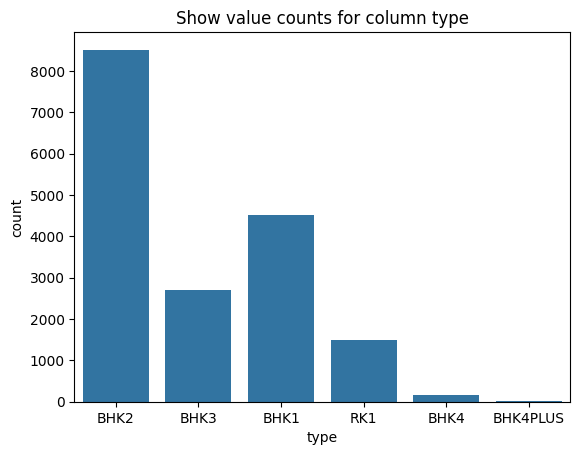

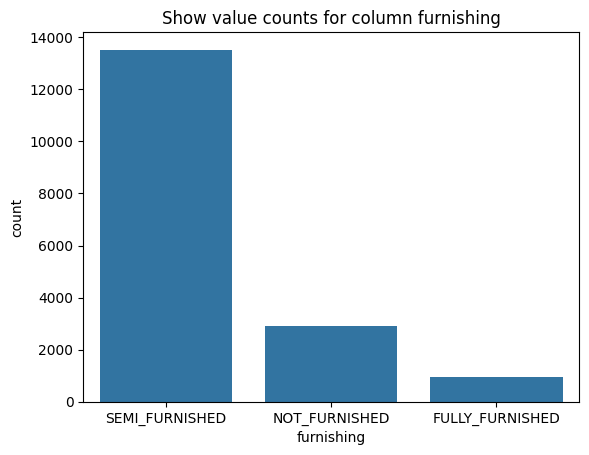

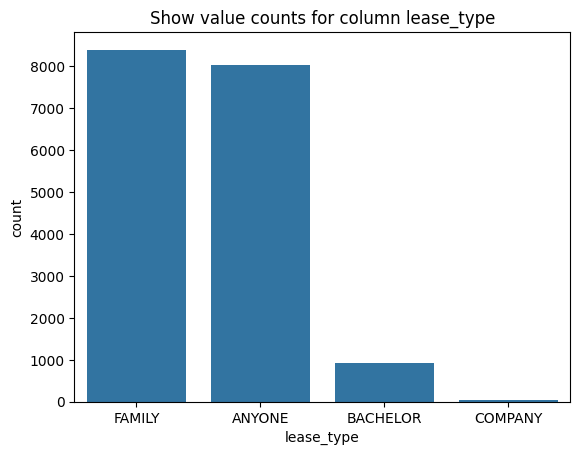

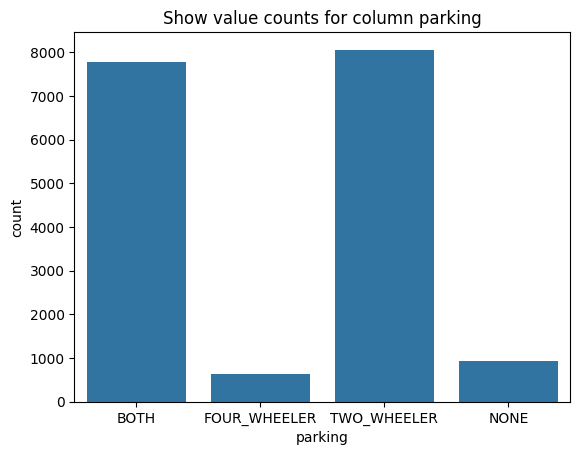

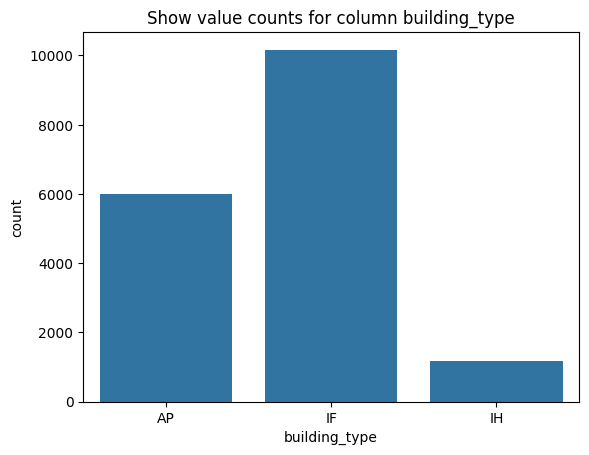

In [ ]:
# Plot count of values in every columns
for col in df_cat.columns[:-2]:
    sns.countplot(x = col,

            data = dataset
                 )
    plt.title(f'Show value counts for column {col}')

    # Show the plot
    plt.show()

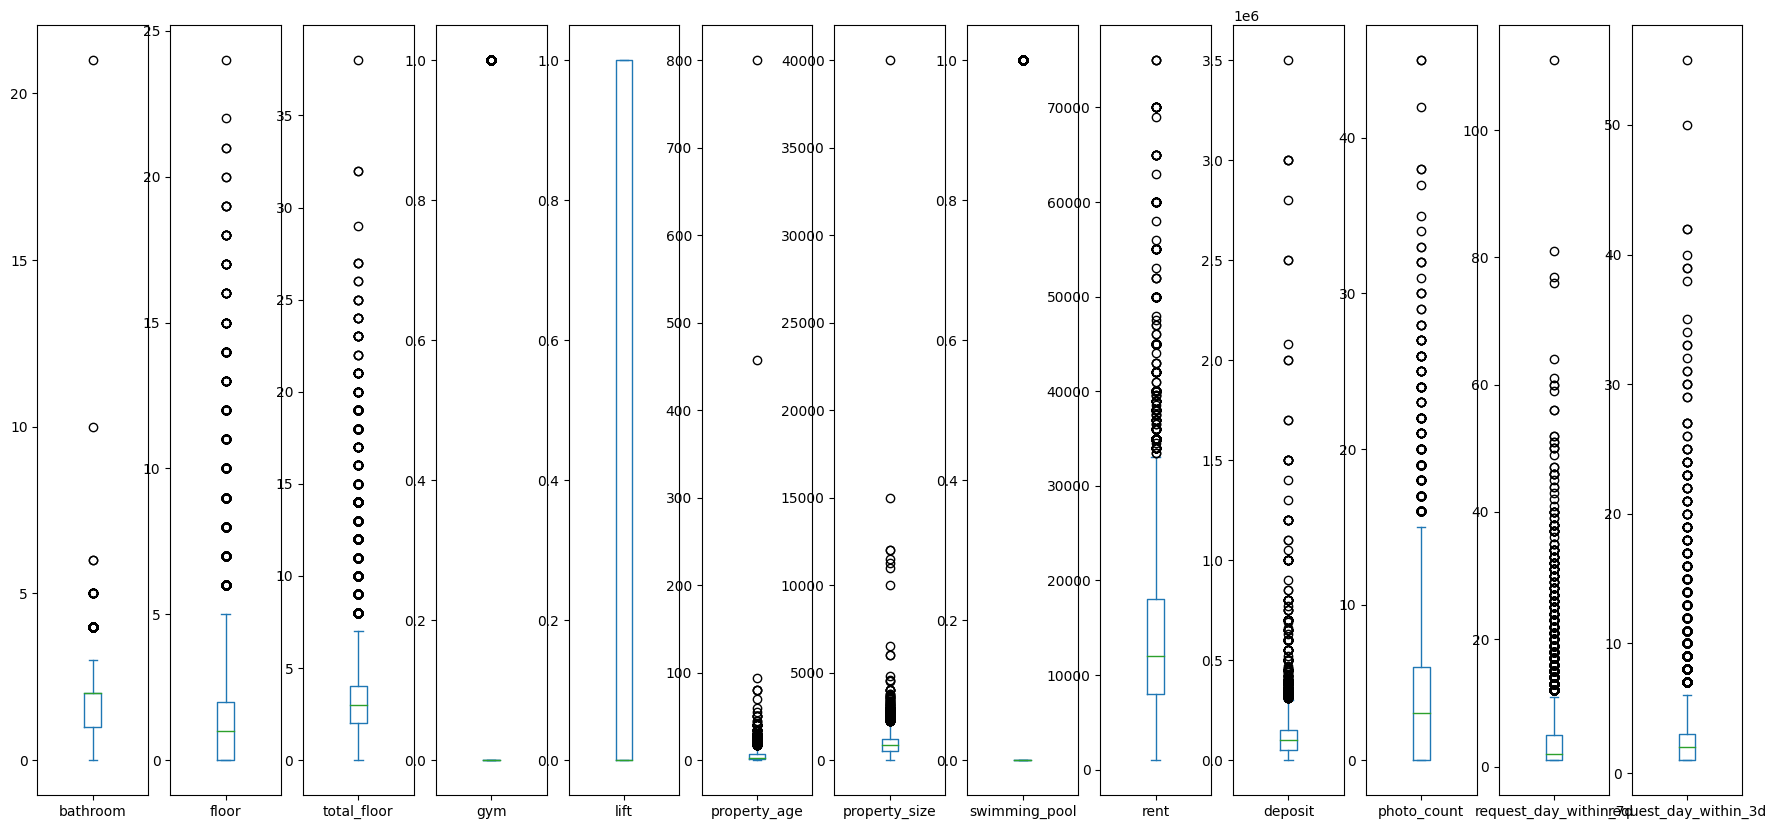

In [ ]:
# Box Plot to show ranges of values and outliers
df_num.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

In [ ]:
# Get some statistics about numeric columns
df_num.describe()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
count,17386.000000,17386.000000,17363.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,1.738600e+04,17386.000000,17386.000000,13210.000000
mean,1.702692,1.726101,3.382077,0.150063,0.265156,4.789141,912.091510,0.126769,13822.809847,1.145386e+05,3.803635,4.013632,2.802801
std,0.716630,2.041864,3.040158,0.357144,0.441429,8.781275,608.803608,0.332723,8272.442456,1.167101e+05,4.231098,5.050688,3.187711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,507.000000,0.000000,8000.000000,5.000000e+04,0.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,0.000000,0.000000,3.000000,875.000000,0.000000,12000.000000,1.000000e+05,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,0.000000,1.000000,7.000000,1200.000000,0.000000,18000.000000,1.500000e+05,6.000000,5.000000,3.000000
max,21.000000,24.000000,38.000000,1.000000,1.000000,800.000000,40000.000000,1.000000,75000.000000,3.500000e+06,45.000000,111.000000,55.000000


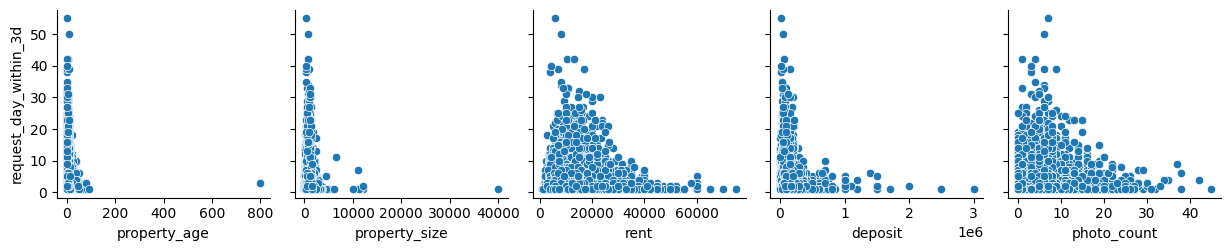

In [ ]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d'])
plt.show()

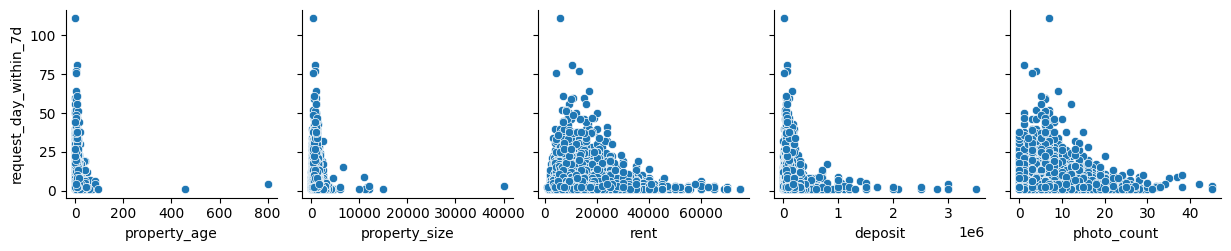

In [ ]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d'])
plt.show()

Feature Engineering

In [ ]:
# Function to remove outliers using quantiles
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 2 * iqr
    fence_high = q3 + 2 * iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_high) & (df_in[col_name] >= fence_low)]
    return df_out

In [ ]:
df_num.columns

Index(['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age',
       'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count',
       'request_day_within_7d', 'request_day_within_3d'],
      dtype='object')

In [ ]:
df = dataset.copy()
for col in df_num.columns:
    if col in ['gym', 'lift', 'swimming_pool',  'request_day_within_3d', 'request_day_within_7d']:
        continue

    df = remove_outlier(df , col)

In [ ]:
def capping_for_3days(x):
    num = 10
    if x > num:
        return num
    else :
        return x
def capping_for_7days(x):
    num = 20
    if x > num:
        return num
    else :
        return x

In [ ]:
df['request_day_within_3d_capping'] = df['request_day_within_3d'].apply(capping_for_3days)
df['request_day_within_7d_capping'] = df['request_day_within_7d'].apply(capping_for_7days)

In [ ]:
df['request_day_within_3d_capping'].value_counts()

request_day_within_3d_capping
1.0     5115
2.0     2403
3.0     1404
4.0      795
5.0      532
10.0     495
6.0      339
7.0      228
8.0      168
9.0      140
Name: count, dtype: int64

In [ ]:
df['request_day_within_7d_capping'].value_counts()[:10]

request_day_within_7d_capping
1     4934
2     2923
3     1848
4     1264
5      937
6      663
7      549
8      330
20     319
9      292
Name: count, dtype: int64

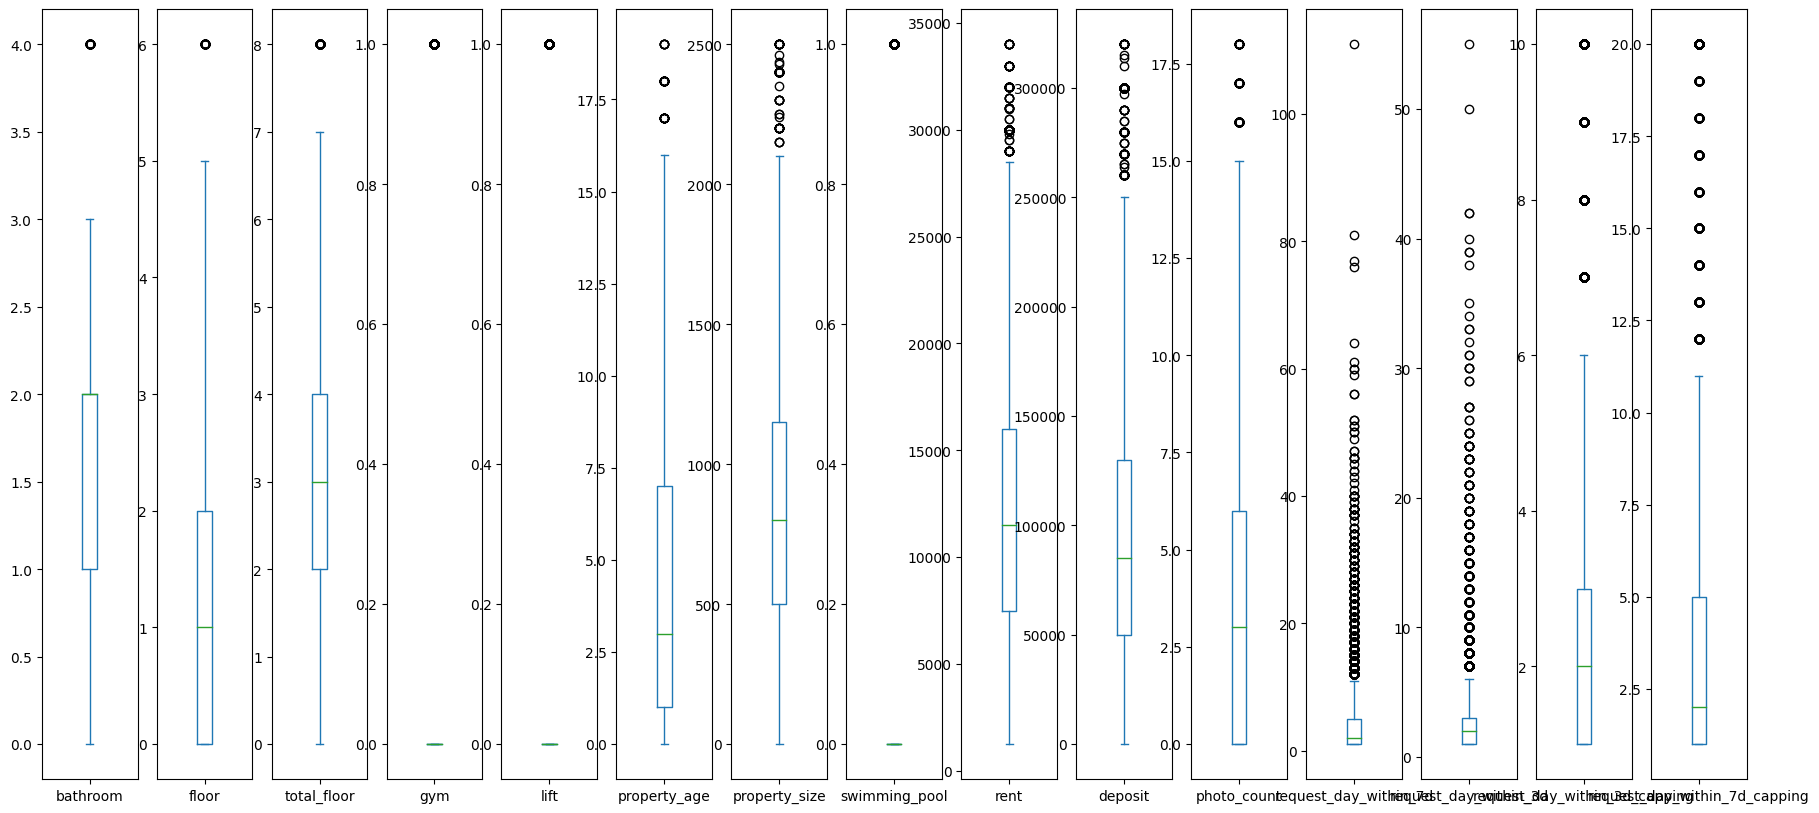

In [ ]:
# Box Plot after removing some values
df.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

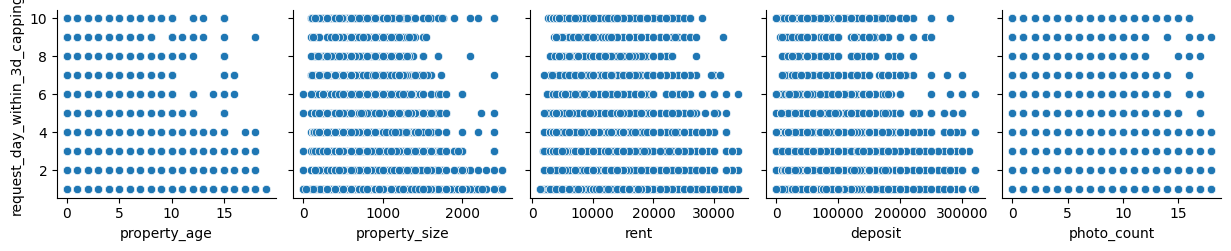

In [ ]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d_capping']
                  )
plt.show()

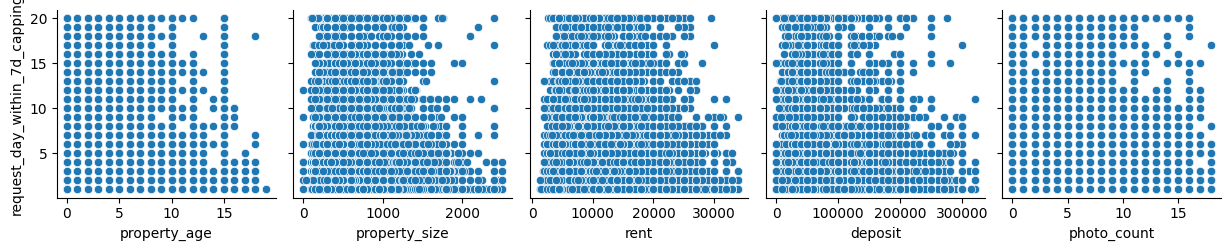

In [ ]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d_capping']

                  )
plt.show()

ValueError: could not convert string to float: 'BHK2'

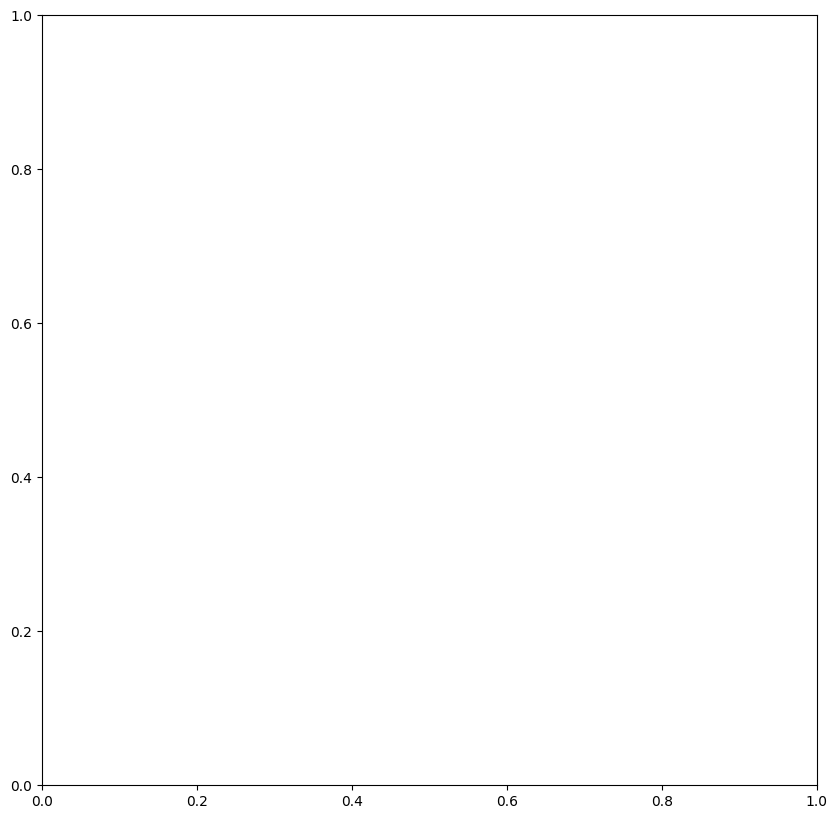

In [ ]:
# Show a correlation on a heat map.
plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

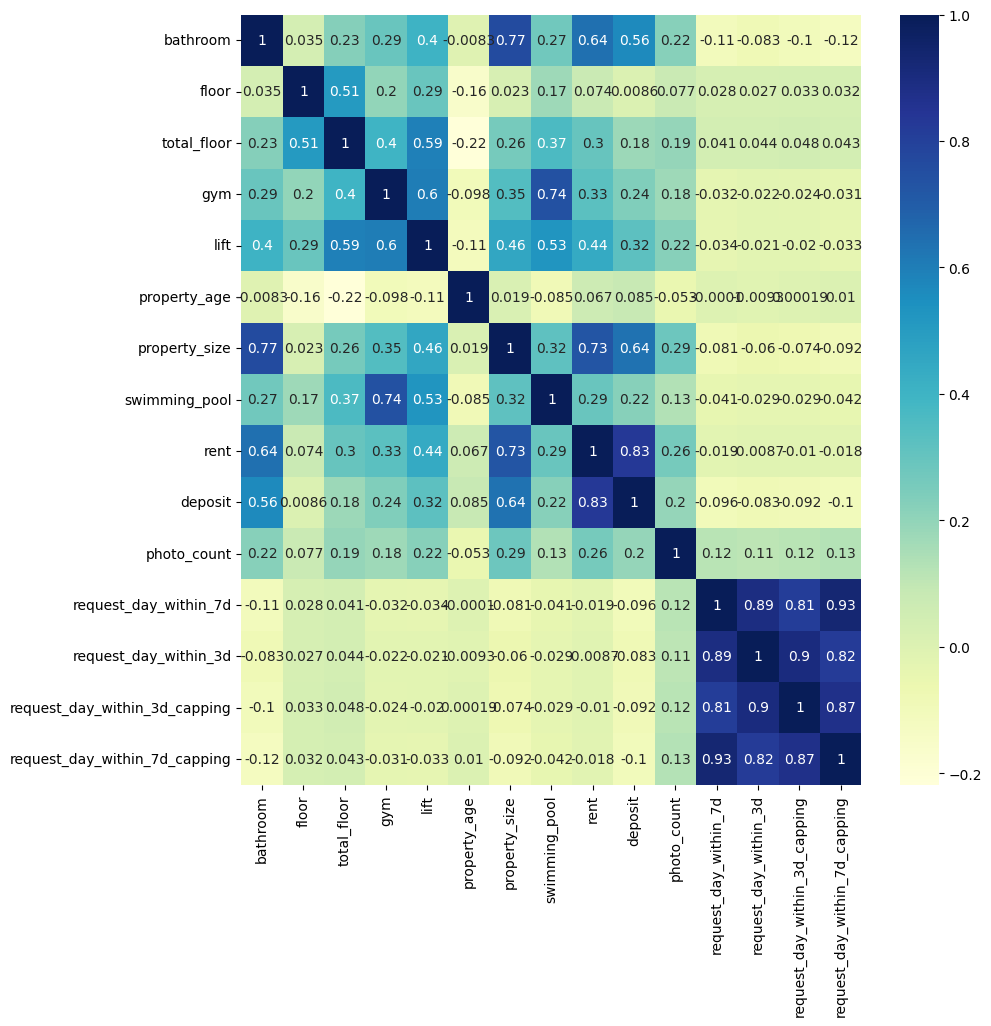

In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float', 'int'])

# Show a correlation on a heat map.
plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
df.sample(5)

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
10964,BHK2,2,3,3.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,0,1150,0,21000,210000,IF,0,1,cat_1_to_2,1.0,cat_1_to_2,1.0,1
4302,BHK2,2,2,5.0,SEMI_FURNISHED,1,ANYONE,1,BOTH,0,1025,1,23000,230000,AP,9,2,cat_1_to_2,2.0,cat_1_to_2,2.0,2
14201,BHK2,2,0,4.0,SEMI_FURNISHED,1,FAMILY,1,BOTH,4,1265,1,23000,200000,AP,5,2,cat_1_to_2,2.0,cat_1_to_2,2.0,2
10905,BHK1,1,3,3.0,SEMI_FURNISHED,0,FAMILY,0,TWO_WHEELER,5,1200,0,10000,50000,IF,0,4,cat_3_to_5,2.0,cat_1_to_2,2.0,4
9425,BHK2,2,4,5.0,SEMI_FURNISHED,1,FAMILY,1,BOTH,2,1115,0,27000,150000,AP,3,8,cat_above_5,2.0,cat_1_to_2,2.0,8


In [ ]:
df.columns

Index(['type', 'bathroom', 'floor', 'total_floor', 'furnishing', 'gym',
       'lease_type', 'lift', 'parking', 'property_age', 'property_size',
       'swimming_pool', 'rent', 'deposit', 'building_type', 'photo_count',
       'request_day_within_7d', 'categories_7day', 'request_day_within_3d',
       'categories_3day', 'request_day_within_3d_capping',
       'request_day_within_7d_capping'],
      dtype='object')

In [ ]:
# One-Hot Encoder for categorical values
# dividing a data to categorical, numeric and label
X = df.drop(['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping'] , axis=1)
x_cat_withNull= df[X.select_dtypes(include=['O']).columns]
x_remain_withNull = df[X.select_dtypes(exclude=['O']).columns]
y = df[['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping']]

In [ ]:
x_remain = pd.DataFrame()
x_cat = pd.DataFrame()

In [ ]:
# Handling Null values
# if we having null values in a numeric columns fill it with mean (Avg)
for col in x_remain_withNull.columns:
    x_remain[col] = x_remain_withNull[col].fillna((x_remain_withNull[col].mean()))
# if we having null values in a categorical columns fill it with mode
for col in x_cat_withNull.columns:
    x_cat[col] = x_cat_withNull[col].fillna(x_cat_withNull[col].mode()[0])

In [ ]:
x_remain.isna().sum()

bathroom         0
floor            0
total_floor      0
gym              0
lift             0
                ..
property_size    0
swimming_pool    0
rent             0
deposit          0
photo_count      0
Length: 11, dtype: int64

In [ ]:
ohe = OneHotEncoder(categories='auto' , handle_unknown='ignore')
feature_train = ohe.fit_transform(x_cat).toarray()
feature_labels = ohe.categories_

new_features = []
for i,j in zip(x_cat.columns,feature_labels):
    new_features.append(f"{i}_"+j)

feature_labels = np.array(new_features, dtype=object).ravel()
f=[]
for i in range(feature_labels.shape[0]):
    f.extend(feature_labels[i])


df_features = pd.DataFrame(feature_train, columns=f)

In [ ]:
print(df_features.shape)

(15170, 20)


In [ ]:
df_features.sample(3)

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH
12357,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12368,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
sc = MinMaxScaler()
x_remain_scaled = sc.fit_transform(x_remain)
x_remain_scaled = pd.DataFrame(x_remain_scaled, columns=x_remain.columns)

In [ ]:
y.head(1)

,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
0,4,cat_3_to_5,4.0,cat_3_to_5,4.0,4


In [ ]:
# Concatenate data after applying One-Hot Encoding
data_with_3days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_3d',
                                                                                                        'request_day_within_3d_capping',
                                                                                                        'categories_3day']].reset_index(drop=True)], axis=1)

In [ ]:
data_with_3days.dropna(inplace=True)
data_with_3days.shape

(11619, 34)

In [ ]:
# Concatenate data after applying One-Hot Encoding
data_with_7days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_7d',
                                                                                                        'request_day_within_7d_capping',
                                                                                                        'categories_7day']].reset_index(drop=True)], axis=1)

In [ ]:
data_with_7days.dropna(inplace=True)

data_with_7days.shape

(15170, 34)

Machine Learning

In [ ]:
data_with_3days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_3d,request_day_within_3d_capping,categories_3day
2248,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.333333,0.25,0.0,1.0,0.789474,0.4304,1.0,0.907176,0.5625,0.333333,1.0,1.0,cat_1_to_2


In [ ]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

In [ ]:
# Split data to train and test sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d'], test_size = 0.2, random_state = seed)
# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))
results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (3.304923)
LASSO: RMS => (3.409854)
KNN: RMS => (3.568860)
CART: RMS => (4.914348)
xgb: RMS => (3.463343)


Second Iteration with capping target column

In [ ]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))
results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)


LR: RMS => (2.278908)
LASSO: RMS => (2.380321)
KNN: RMS => (2.473213)
CART: RMS => (3.181372)
xgb: RMS => (2.348409)


Third Iteration with Classification

In [ ]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_3day'], test_size = 0.2, random_state = seed)

In [ ]:
y['categories_3day'].value_counts()

categories_3day
cat_1_to_2     7518
cat_3_to_5     2731
cat_above_5    1370
Name: count, dtype: int64

In [ ]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.65      0.99      0.79      1511
  cat_3_to_5       0.29      0.01      0.01       528
 cat_above_5       0.52      0.04      0.07       285

    accuracy                           0.65      2324
   macro avg       0.49      0.35      0.29      2324
weighted avg       0.55      0.65      0.52      2324



Conclusion: Based on the results, the f1-score is 65% and that result is not bad but because the data is unbalanced, the model detects cat_1_to_2 is better than the other.

In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.67      0.90      0.77      1511
  cat_3_to_5       0.29      0.12      0.17       528
 cat_above_5       0.31      0.08      0.12       285

    accuracy                           0.62      2324
   macro avg       0.42      0.37      0.35      2324
weighted avg       0.54      0.62      0.55      2324



Based on the results, the f1-score is 62% and that result is not bad it's better than logistic regression.

**Predicting interactions in 7 days**

In [ ]:
data_with_7days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_7d_capping,categories_7day
6091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.333333,0.625,0.0,1.0,0.0,0.464,0.0,0.450382,0.46875,0.444444,1,1,cat_1_to_2


In [ ]:
X = data_with_7days.drop(['request_day_within_7d',
                          'request_day_within_7d_capping',
                          'categories_7day'], axis=1)
y = data_with_7days[['request_day_within_7d', 'request_day_within_7d_capping', 'categories_7day']]

In [ ]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))
results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (5.253394)
LASSO: RMS => (5.459693)
KNN: RMS => (5.596532)
CART: RMS => (7.160084)
xgb: RMS => (5.353307)


Based on the results, linear regression has less RMS (root mean square) so it is the best.

In [ ]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d_capping'], test_size = 0.2, random_state = seed)
# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))
results = []
names = []
for name, model in models:
    # model
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error
    rms = np.sqrt(mean_squared_error(y_test, y_pred))

    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (4.054366)
LASSO: RMS => (4.249220)
KNN: RMS => (4.320105)
CART: RMS => (5.797303)
xgb: RMS => (4.130722)


As a result of this iteration, the result is better, and the best model is still linear regression because it has a lower RMS

In [ ]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_7day'], test_size = 0.2, random_state = seed)

In [ ]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.55      0.91      0.68      1570
  cat_3_to_5       0.23      0.01      0.03       794
 cat_above_5       0.42      0.22      0.29       670

    accuracy                           0.53      3034
   macro avg       0.40      0.38      0.33      3034
weighted avg       0.44      0.53      0.42      3034



In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.56      0.74      0.64      1570
  cat_3_to_5       0.27      0.19      0.22       794
 cat_above_5       0.37      0.24      0.29       670

    accuracy                           0.48      3034
   macro avg       0.40      0.39      0.38      3034
weighted avg       0.44      0.48      0.45      3034



Based on the results, classification is a bad choice here.

**Deep Learning**

In [ ]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

In [ ]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
291/291 [==============================] - 4s 10ms/step - loss: 5.3806
Epoch 2/50
291/291 [==============================] - 4s 15ms/step - loss: 5.2031
Epoch 3/50
291/291 [==============================] - 4s 12ms/step - loss: 5.1360
Epoch 4/50
291/291 [==============================] - 3s 10ms/step - loss: 5.1268
Epoch 5/50
291/291 [==============================] - 3s 9ms/step - loss: 5.0895
Epoch 6/50
291/291 [==============================] - 3s 10ms/step - loss: 5.0472
Epoch 7/50
291/291 [==============================] - 5s 16ms/step - loss: 5.0364
Epoch 8/50
291/291 [==============================] - 3s 9ms/step - loss: 5.0213
Epoch 9/50
291/291 [==============================] - 3s 9ms/step - loss: 4.9737
Epoch 10/50
291/291 [==============================] - 3s 9ms/step - loss: 4.9499
Epoch 11/50
291/291 [==============================] - 2s 7ms/step - loss: 4.9124
Epoch 12/50
291/291 [==============================] - 2s 8ms/step - loss: 4.9021
Epoch 13/50
291/291

This gives a slighly better RMS than linear regression, since it has a lower loss as compared